# Тестовое по Python

В качестве тестового предлагается несколько задач на pandas, numpy и matplotlib - базовые библиотеки, используемые в ходе ML разработки

Если вы не встречались с этими библиотеками раньше, то это отличный повод их изучить до или во время выполнения заданий

## numpy

In [29]:
import numpy as np

### 1. Cоздание и индексация n-мерных массивов

Создать двухмерный массив случайных чисел [-9; 9] размера (10, 10). Заменить все -3<x<5 элементы такого массива на единицы, показать массив до и после замены. Циклы использовать нельзя

In [30]:
matrix = np.random.randint(-9,9,(10,10))
matrix

array([[ 0,  6,  0, -6,  1, -7, -3, -2,  0,  2],
       [-9, -4, -9, -4, -2, -4,  0,  1, -5, -7],
       [ 7, -6,  3,  7,  3,  3, -1, -3,  6, -2],
       [ 4,  8, -5, -1, -6,  3, -9,  5, -3,  8],
       [ 7, -6,  8,  6,  6, -6, -7,  3,  3, -7],
       [ 6,  0,  5, -4,  0,  6, -1,  3,  2, -7],
       [-8,  7,  3, -1, -4,  5,  1,  4,  0,  8],
       [-4, -5,  6, -4,  8,  7, -4, -7, -9, -4],
       [-1, -4, -2, -1,  1,  0,  7, -2,  6,  7],
       [-2, -2,  2,  8, -6,  7, -2,  3, -4, -8]])

In [58]:
matrix = ((matrix < 5) * (matrix > -3)) * 1

In [59]:
matrix

array([[0, 0, 0, 0, 0, 0, 1, 1, 0, 0],
       [0, 1, 0, 0, 0, 1, 1, 0, 0, 0],
       [1, 1, 0, 1, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
       [0, 0, 1, 1, 1, 0, 0, 0, 0, 0]])

### 2. Умножение матриц
Даны вектор и матрица (размер задайте сами), найти в матрице столбец(=вектор), имеющий минимальное косинусное расстояние с исходным вектором. Результат вывести, проверить корректность расчёта. Использовать циклы всё ещё нельзя, как и разделять матрицу на части

In [32]:
from numpy.linalg import norm

In [33]:
np.random.seed(4)
vector = np.random.randint(1,10,10)
matrix = np.random.randint(1,20,(10,10))
matrix_cos = 1 - (np.divide(np.dot(vector, matrix),(norm(vector)*norm(matrix,axis = 0))))
print(matrix_cos)
print("Colomn No.: ", list(matrix_cos).index(matrix_cos.min()))
1 - (np.divide(np.dot(vector, matrix.T[0]),(norm(vector)*norm(matrix.T[0]))))

[0.1143117  0.08648488 0.12483019 0.21895996 0.15956942 0.19054739
 0.14444147 0.21384095 0.17412075 0.18569074]
Colomn No.:  1


0.11431169696170262

In [34]:
# Проверка корректности 
from scipy.spatial.distance import cosine
cos_min = 10
dist = []
for i in range(matrix.shape[0]):
    dist.append(cosine(vector,matrix.T[i]))
    if cosine(vector,matrix.T[i]) < cos_min:
        cos_min = cosine(vector,matrix.T[i])
        
print(cos_min, dist)

0.08648487679692807 [0.11431169696170262, 0.08648487679692807, 0.12483019208342416, 0.21895995948631075, 0.15956941831926075, 0.190547386265011, 0.14444146937707458, 0.21384095486561439, 0.1741207536605871, 0.18569073872599207]


### 3. Умножение векторов
Пусть импульс - это функция, определённая на R принимающая значение 1 на [a; b], а на остальной области определения равная нулю

Есть два импульса: 
    - [4, 5]
    - [1, 2], но его область определения ограничена - [0, 3]
   
Изучить операцию [свёртки](https://ru.wikipedia.org/wiki/Свёртка_(математический_анализ)) и сделать свёртку первого импульса вторым, показать результат свёртки. Первая гифка приведённой статьи в помощь

Использовать цикл можно, но только для реализации [метода скользящего окна](https://wiki.loginom.ru/articles/windowing-method.html)

In [44]:
f = np.array([0,0,0,0,1,1,0])
g = np.array([0,1,1,0,0,0,0])
w = np.convolve(f,g)
print(w)

[0 0 0 0 0 1 2 1 0 0 0 0 0]


## Pandas

In [36]:
import pandas as pd

Для выполнения задания используйте классический датасет [Titanic](https://www.kaggle.com/c/titanic/data). Всё ещё нельзя использовать циклы

In [37]:
data = pd.read_csv('train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### 1. Groupby

Сгруппировать пассажиров по полу, подумать над смыслом полученных значений в сгруппированной табличке

In [38]:
data.groupby('Sex').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


In [39]:
data.groupby('Sex').sum()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,135343,233,678,7286.00,218,204,13966.6628
male,262043,109,1379,13919.17,248,136,14727.2865


### 2. Средние

Посчитать среднюю цену билета по датасету, найти 75ый [процентиль](https://ru.wikipedia.org/wiki/Квантиль) цен в датасете

In [40]:
data.Fare.mean() #Mean value of Fare

32.204207968574636

In [41]:
data.Fare.describe()["75%"] #75% of Fare

31.0

### 3. Фильтрация

Разбить таблицу по 75ому процентилю цены билета, сравнить выживаемость в первой и второй половине

In [42]:
more_75 = data.query('Fare >= 31.0')
less_75 = data.query('Fare < 31.0')
print("Больше 75 процентиля цены билета выжило: ", more_75.Survived.sum(), " человек")
print("Меньше 75 процентиля цены билета выжило: ", less_75.Survived.sum(), " человек")

Больше 75 процентиля цены билета выжило:  131  человек
Меньше 75 процентиля цены билета выжило:  211  человек


# Matplotlib

In [45]:
import matplotlib.pyplot as plt

### 1. Гистограммы

- Постройте гистограмму по массиву из 200 случайных чисел
- Сделайте то же, но с 200 случайными числами, имеющими нормальное распределение
- (Со звёздочкой) Сгенерируйте нормальное распределение, не используя функции генерации чисел с нормальным распределением

<BarContainer object of 200 artists>

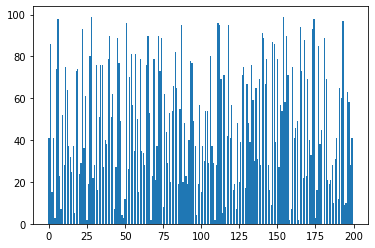

In [46]:
x = np.arange(0,200)
y = np.random.randint(0,100,200)
plt.bar(x,y)

<BarContainer object of 200 artists>

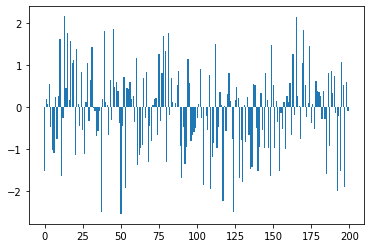

In [57]:
x = np.arange(0,200)
y = np.random.randn(200)
plt.bar(x,y)

### 2. Проиллюстрируйте задачи по numpy

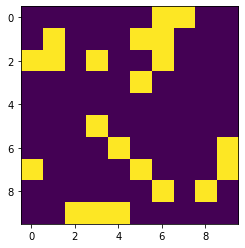

In [60]:
plt.imshow(matrix)

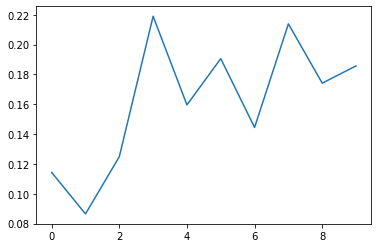

In [62]:
plt.plot(np.arange(len(dist)),dist )

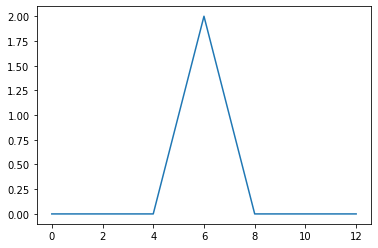

In [63]:
plt.plot(np.arange(len(w)),w )

### 3. Scatter plot 

Кластер - объединение данных с похожими признаками. Например, нам необходимо посчитать средний балл егэ по химии среди учеников 11 класса. 
Так как школьники учатся в разных по глубине изучения предмета школах, то и экзамены сдают на разные баллы. Мы можем рассматривать 3 класса (физмат, химбио и гум). Представим балл одного школьника как точку на оси целых чисел. Мы увидим скопления вокруг некоторых трёх средних значений баллов - средних по каждому из классов. Это будут кластеры баллов в нашем мысленном эксперименте.
 
 - Вам предлагается сгенерировать множество двухмерных точек такое, чтобы при отрисовке scatterplot'а были видны 3 кластера. Будет плюсом, если кластеры будут частично пересекаться 
  
    
 - Отразите эти данные на плоскости с помощью метода scatter. Используте цвет, чтобы показать принадлежность точки к кластеру
 
 У вас должна получиться картинка, наподобие представленной ниже:
 
 ![img](https://www.r-graph-gallery.com/img/graph/274-map-a-variable-to-ggplot2-scatterplot.png)

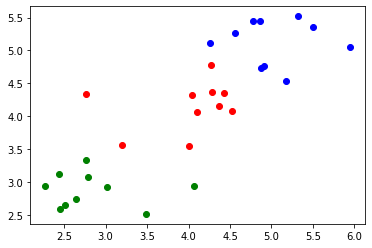

In [78]:
fiz_y = np.random.normal(loc=4, scale=0.50, size=10)
him_y = np.random.normal(loc=5, scale=0.50, size=10)
gum_y = np.random.normal(loc=3, scale=0.50, size=10)
fiz_x = np.random.normal(loc=4, scale=0.50, size=10)
him_x = np.random.normal(loc=5, scale=0.50, size=10)
gum_x = np.random.normal(loc=3, scale=0.50, size=10)
plt.scatter(fiz_x, fiz_y, c = 'r')
plt.scatter(him_x, him_y, c = 'b')
plt.scatter(gum_x, gum_y, c = 'g')